#### Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [42]:
df = sns.load_dataset('iris')

In [43]:
# View the first 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
# View the last 5 rows of the dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [45]:
# Check the shape of dataset

rows, cols = df.shape
print(f'This dataset consist on {rows} rows and {cols} columns.')

This dataset consist on 150 rows and 5 columns.


In [46]:
# Get the basic information about whole dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
# Check NaN/Null/Missing values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [48]:
# Check duplicate values

df.duplicated().sum()

np.int64(1)

In [49]:
# There is 1 duplicate value in the dataset, so we will remove it.
df.drop_duplicates(inplace=True)

In [50]:
# Get the statistical measures about the dataset

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
# Separate the target and input features/columns for further analysis, where X are input features and y is target feature.

X = df.iloc[:, :4]
y = df["species"]

#### Univariate Analysis

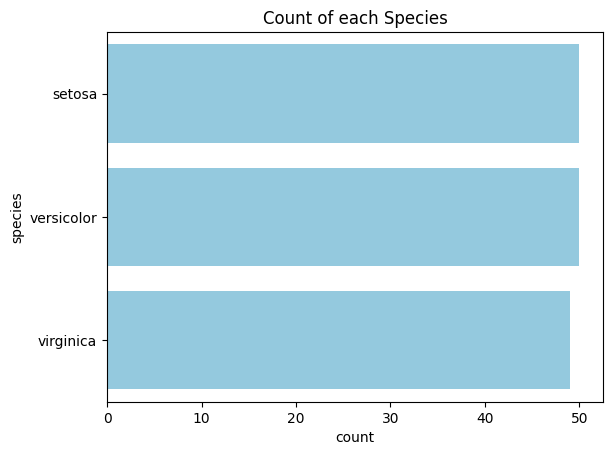

In [52]:
# Count the values of target feature

sns.countplot(y, color='skyblue')
plt.title('Count of each Species')
plt.show()

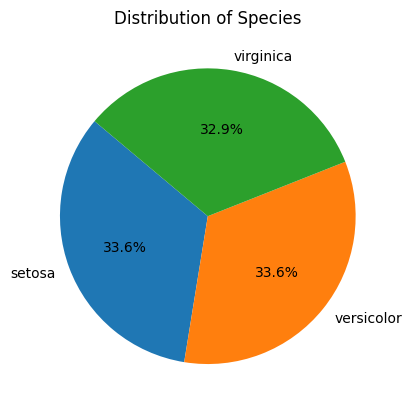

In [53]:
# Visualize the distribution of target feature using pie chart

plt.pie(y.value_counts(), labels=y.unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Species')
plt.show()

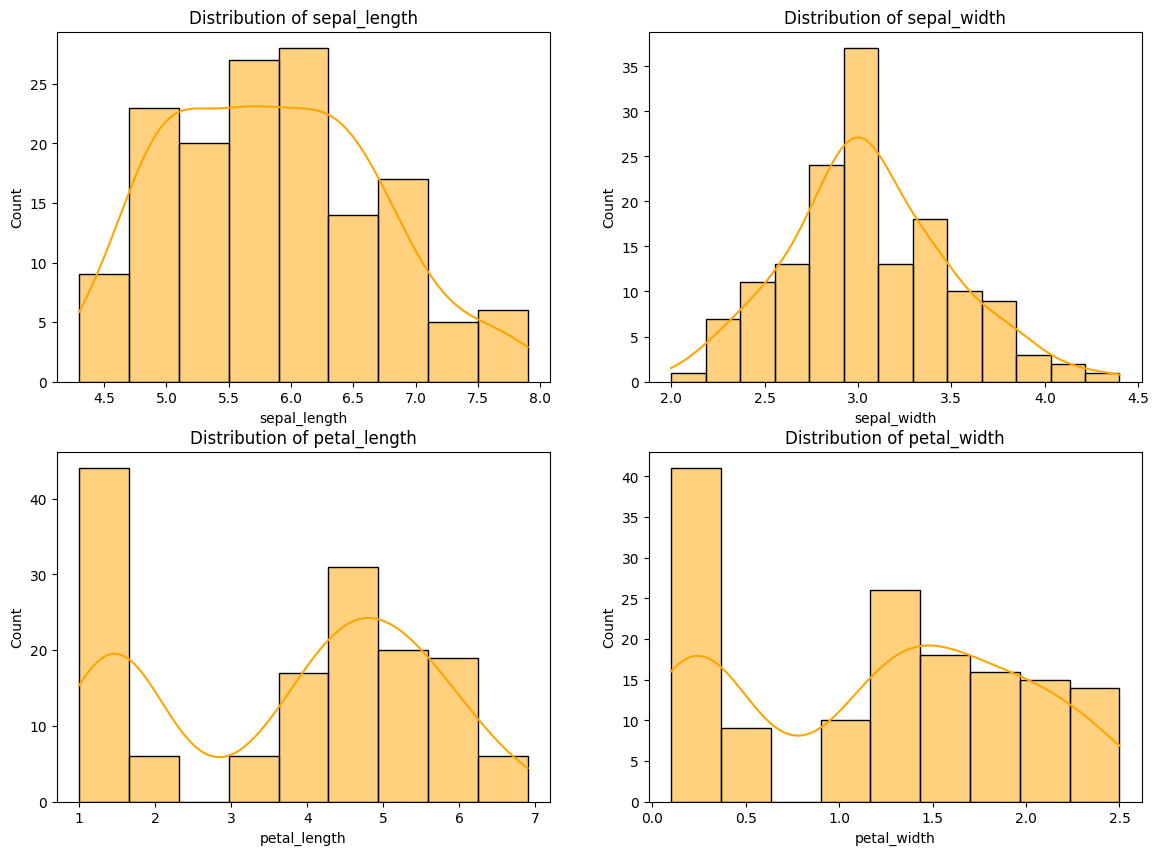

In [35]:
# Count the values of input features

plt.figure(figsize=(14,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    sns.histplot(X[var], kde=True, color='orange')
    plt.title(f'Distribution of {var}')

In [36]:
# Check Skewness of numeric features

for i in X.columns:
    print("Skewness in {} is: {}".format(i, X[i].skew()))

Skewness in sepal_length is: 0.31282618518725164
Skewness in sepal_width is: 0.30714862900770284
Skewness in petal_length is: -0.2631010864738464
Skewness in petal_width is: -0.09007614642546066


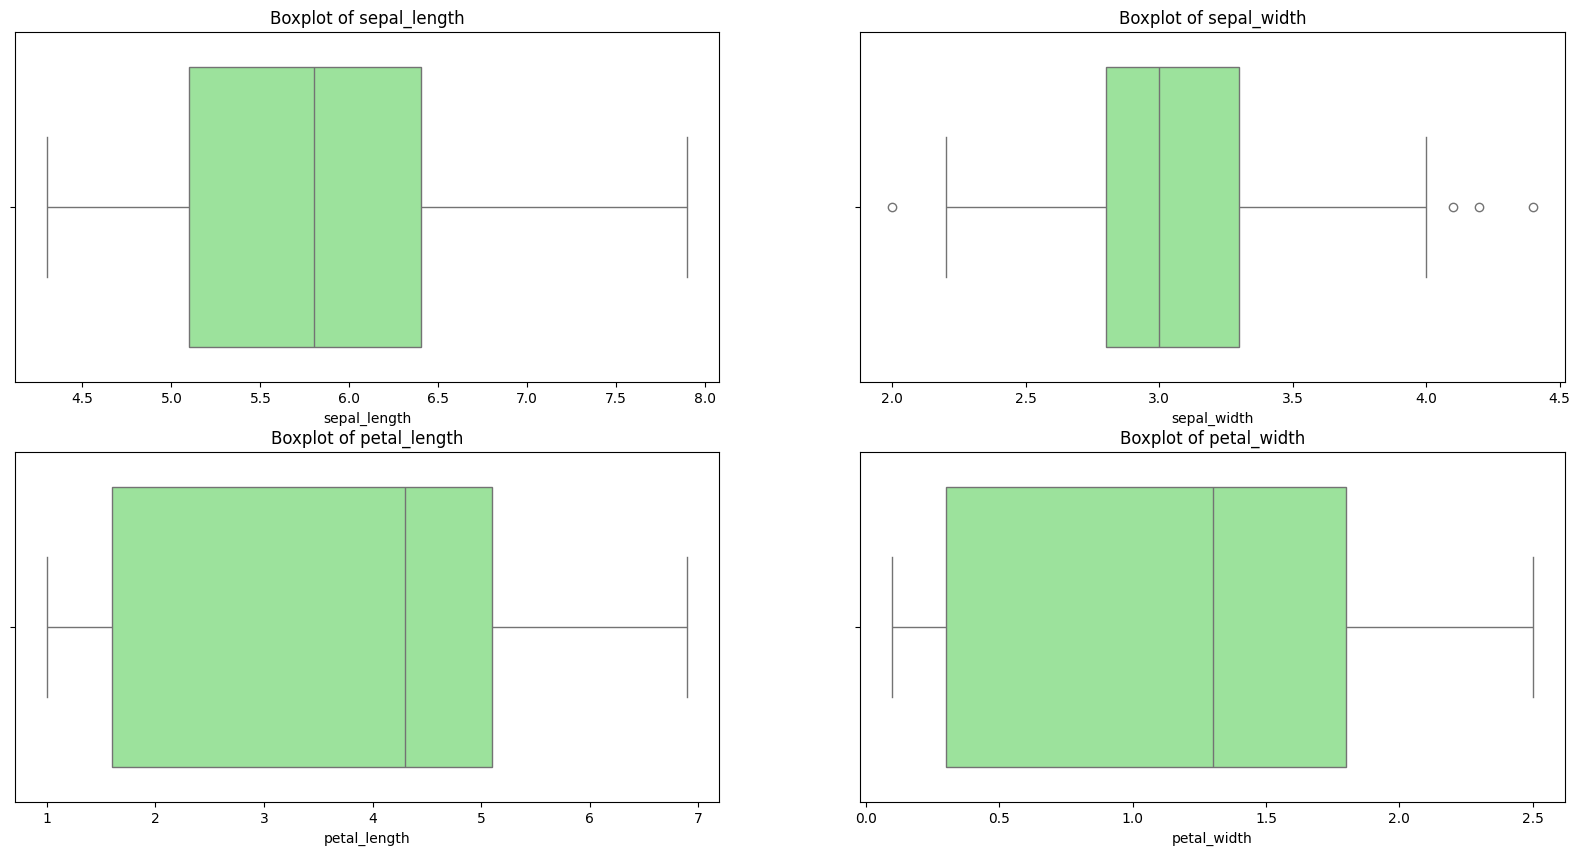

In [37]:
# Outliers detection in numeric features

plt.figure(figsize=(20,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(X[var], color='lightgreen', orient='h')
    plt.title(f'Boxplot of {var}')  

#### Bivariate and Multivariate Analysis

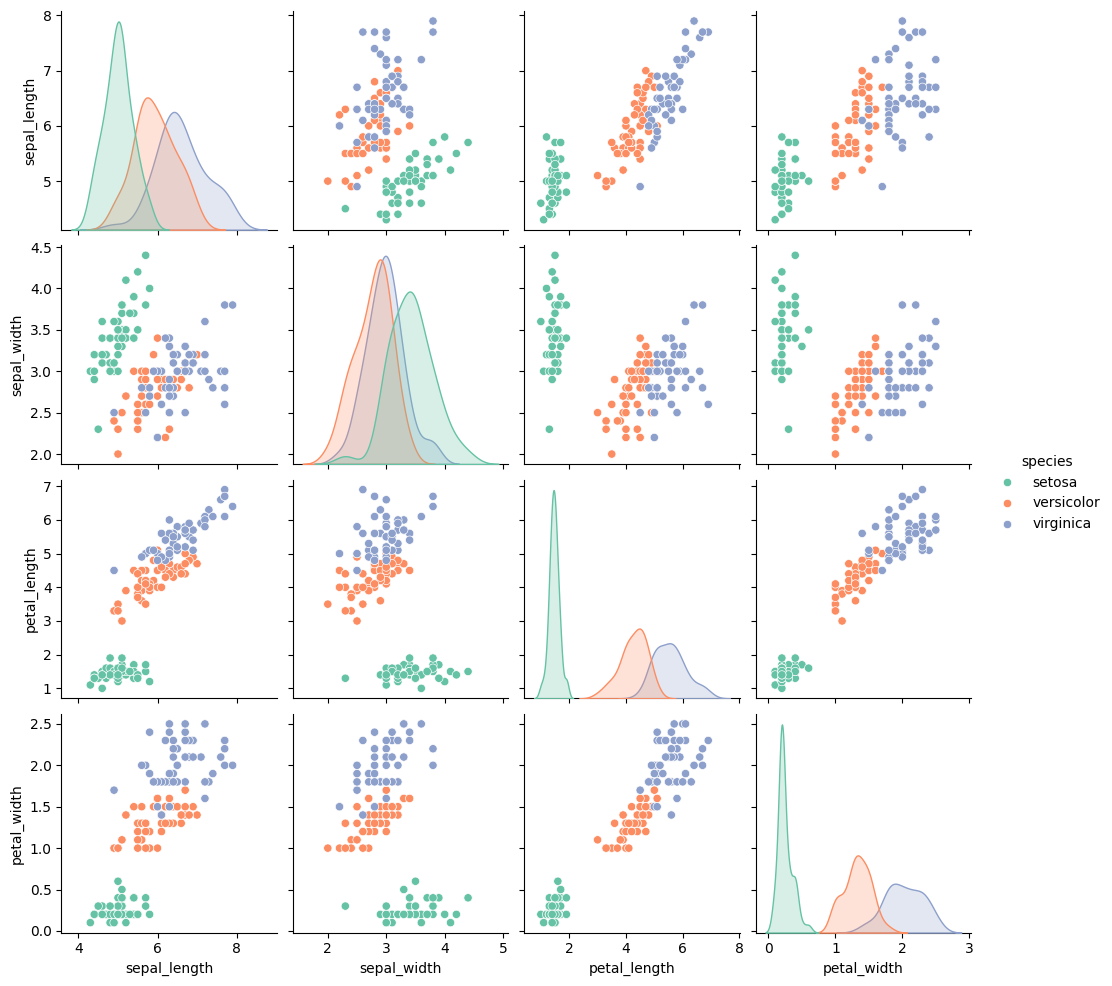

In [38]:
# See the relationship b/w each numeric feature with other numeric feature

sns.pairplot(df, hue='species', diag_kind='kde', palette='Set2')
plt.show()

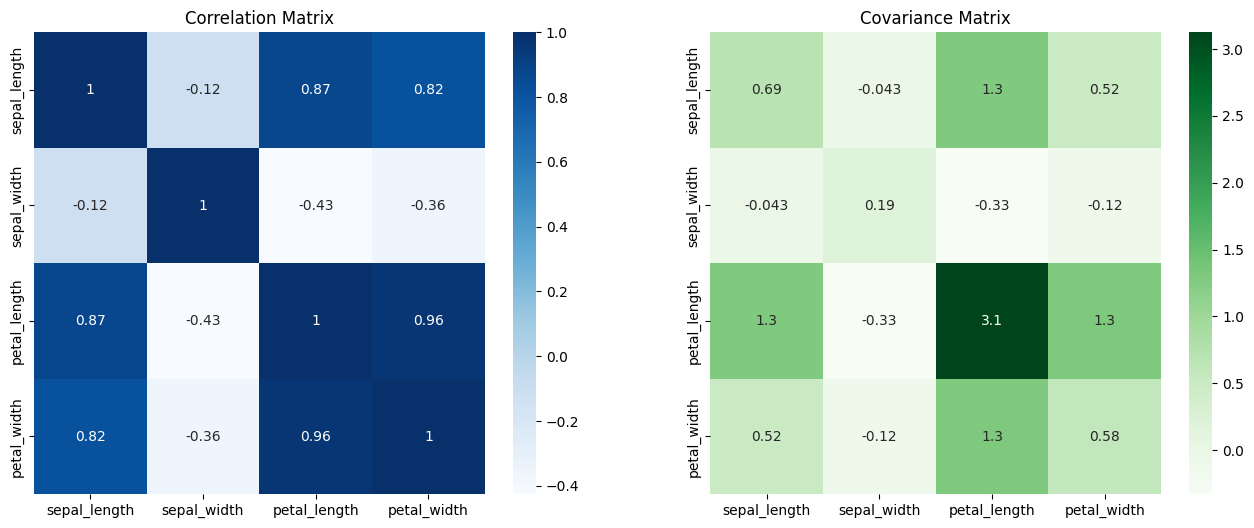

In [39]:
# Correlation and Covariannce Matrix of Numeric features
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')

plt.subplot(1,2,2)
sns.heatmap(X.cov(), annot=True, cmap='Greens')
plt.title('Covariance Matrix')

plt.show()

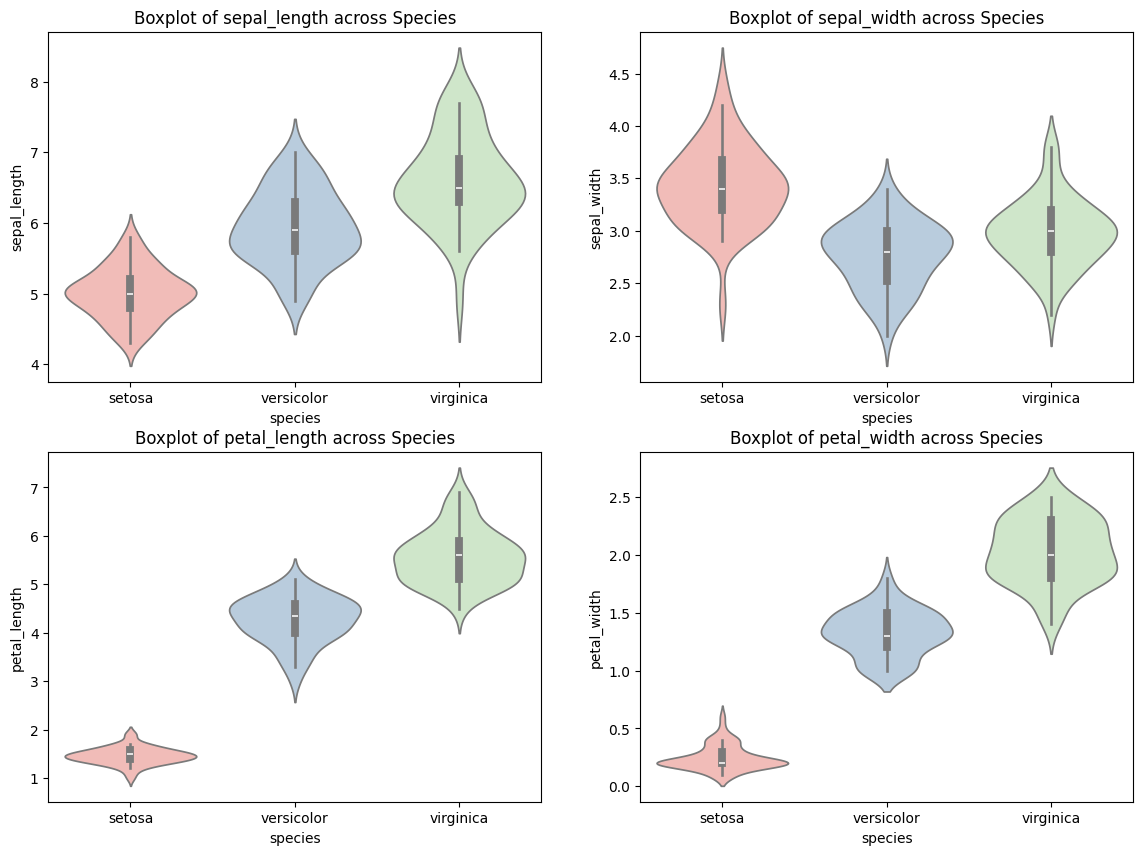

In [40]:
# violin plot to see the distribution of numeric features across target feature

plt.figure(figsize=(14,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=y, y=X[var], palette='Pastel1')
    plt.title(f'Boxplot of {var} across Species')

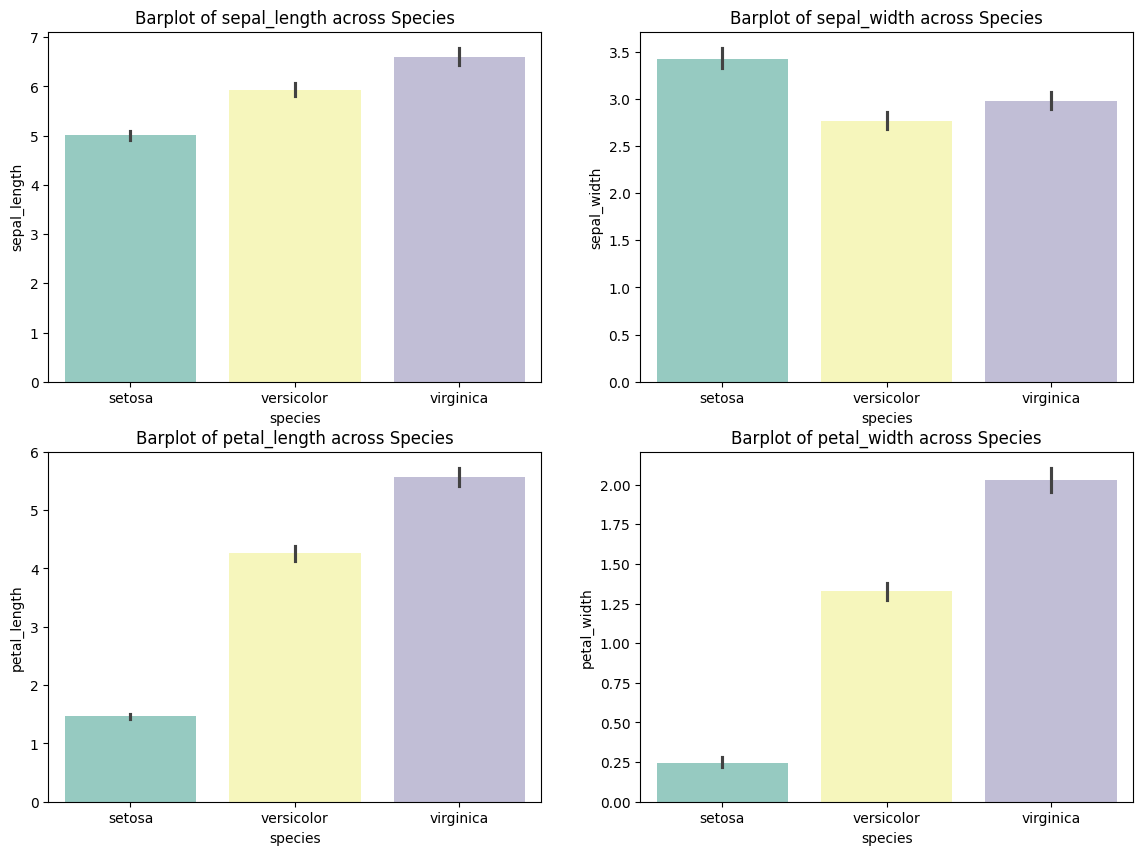

In [55]:
# Barplot b/w input and target features

plt.figure(figsize=(14,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    sns.barplot(x=y, y=X[var], palette='Set3')
    plt.title(f'Barplot of {var} across Species')